In [1]:
import os
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff

In [2]:
m = leafmap.Map(center=[37.8713, -122.2580], zoom=17, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[37.8713, -122.258], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [3]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [-122.2659, 37.8682, -122.2521, 37.8741]

In [5]:
image = "satellite2.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=17, source="Satellite", overwrite=True)

Downloaded image 01/24
Downloaded image 02/24
Downloaded image 03/24
Downloaded image 04/24
Downloaded image 05/24
Downloaded image 06/24
Downloaded image 07/24
Downloaded image 08/24
Downloaded image 09/24
Downloaded image 10/24
Downloaded image 11/24
Downloaded image 12/24
Downloaded image 13/24
Downloaded image 14/24
Downloaded image 15/24
Downloaded image 16/24
Downloaded image 17/24
Downloaded image 18/24
Downloaded image 19/24
Downloaded image 20/24
Downloaded image 21/24
Downloaded image 22/24
Downloaded image 23/24
Downloaded image 24/24
Saving GeoTIFF. Please wait...
Image saved to satellite2.tif


In [6]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=12958516.0, center=[37.87129639254548, -122.25801050662994], controls=(ZoomControl(options=['positi…

In [7]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=None,
)

In [8]:
sam.generate(image, output="masks.tif", foreground=True, unique=True)

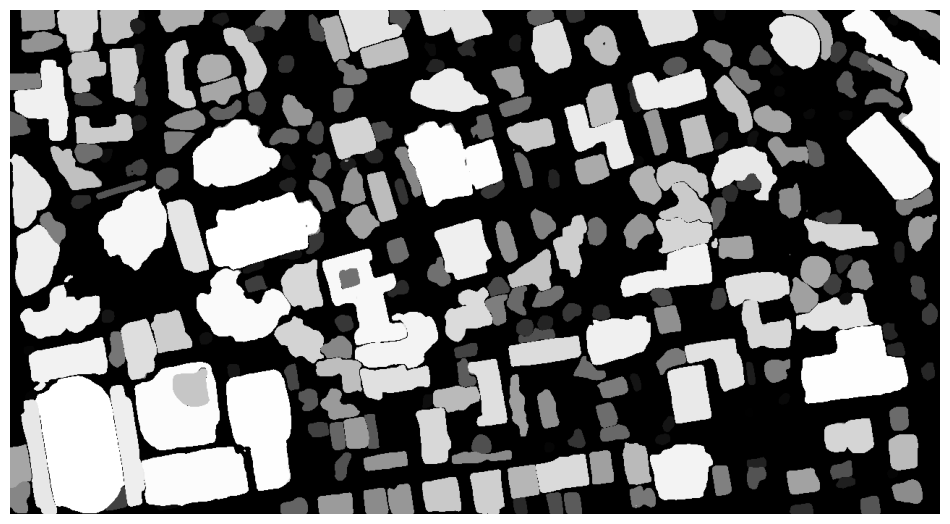

In [9]:
sam.show_masks(cmap="binary_r")

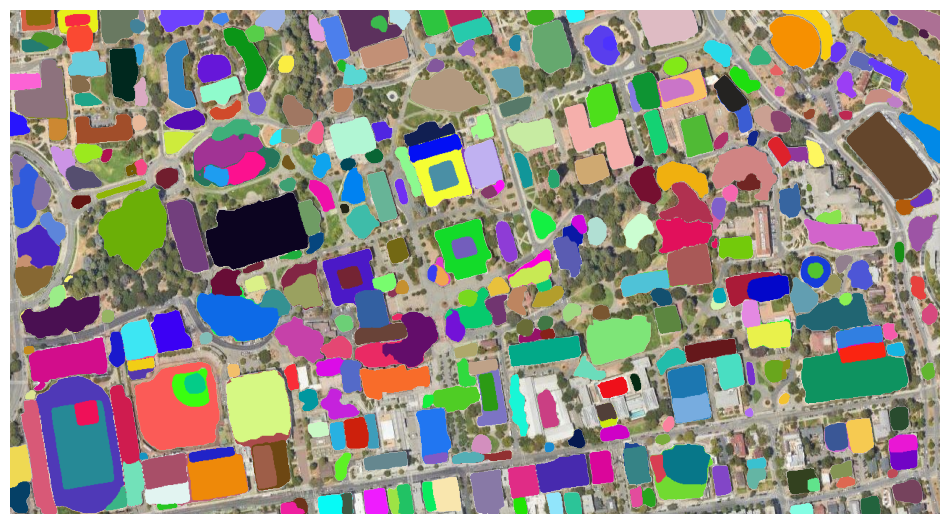

In [10]:
sam.show_anns(axis="off", alpha=1, output="annotations.tif")


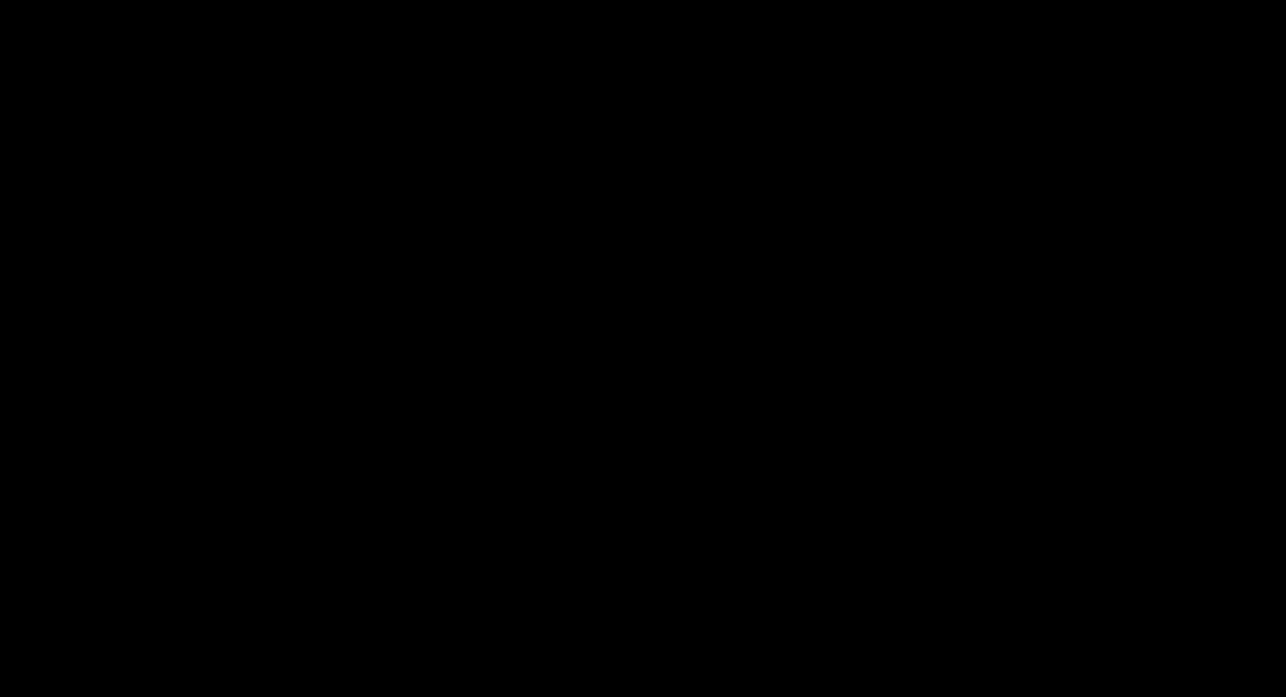
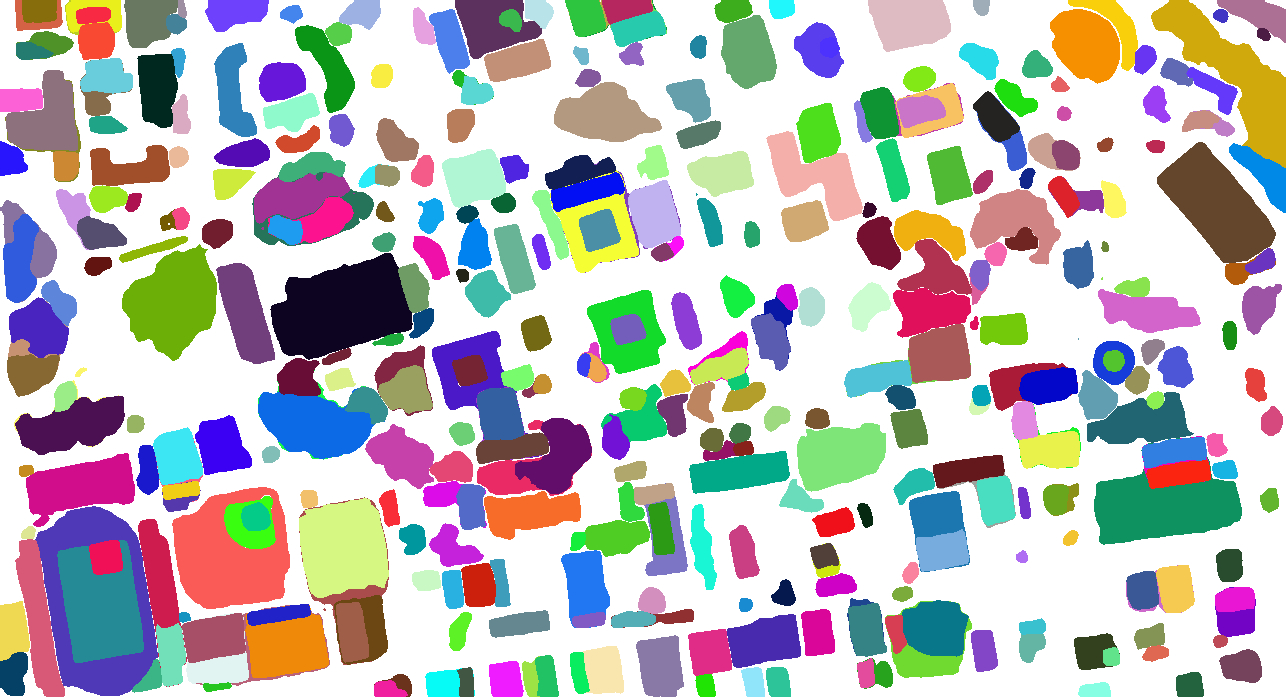

In [11]:
leafmap.image_comparison(
    "satellite.tif",
    "annotations.tif",
    label1="Satellite Image",
    label2="Image Segmentation",
)

In [12]:
m.add_raster("annotations.tif", alpha=0.5, layer_name="Masks")
m

Map(bottom=12958700.000003356, center=[37.8697380332531, -122.25858986377717], controls=(ZoomControl(options=[…

In [13]:
sam.tiff_to_vector("masks.tif", "masks.gpkg")